# 7. Potential evapotranspiration under warming and elevated $CO_2$ concentration
*M. Vremec, R.A. Collenteur University of Graz, 2021*

In this notebook it is shown how to estimate Potential Evapotranspiration under elevated $CO_2$ conditions and an increase in temperature.
The work follows the suggestions made by Yang et al. (2019) to include the sensitivity of stomatal resistance to $CO_2$ in the Penman-Monteith equation.

Yang, Y., Roderick, M.L., Zhang, S. et al. Hydrologic implications of vegetation response to elevated CO2 in climate projections. Nature Clim Change 9, 44–48 (2019). https://doi.org/10.1038/s41558-018-0361-0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pyet as pyet

## 1. Load daily data from ZAMG (Messstationen Tagesdaten)

station: Graz Universität 16412

Selected variables:
- globalstrahlung (global radiation), J/cm2 needs to be in MJ/m3d, ZAMG abbreviation - strahl
- arithmetische windgeschwindigkeit (wind speed), m/s, ZAMG abbreviation - vv
- relative feuchte (relative humidity), %, ZAMG abbreviation - rel
- lufttemparatur (air temperature) in 2 m, C, ZAMG abbreviation - t
- lufttemperatur (air temperature) max in 2 m, C, ZAMG abbreviation - tmax
- lufttemperatur (air temperature) min in 2 m, C, ZAMG abbreviation - tmin
- latitute and elevation of a station

In [2]:
#read data
data_16412 = pd.read_csv('data//example_1//klima_daily.csv', index_col=1, parse_dates=True)
data_16412

,station,strahl,rel,t,tmax,tmin,vv
time,,,,,,,
2000-01-01,16412,300.0,80.0,-2.7,0.5,-5.8,1.0
2000-01-02,16412,250.0,86.0,0.2,2.5,-2.1,1.0
2000-01-03,16412,598.0,86.0,0.6,3.6,-2.4,1.0
2000-01-04,16412,619.0,83.0,-0.5,4.5,-5.5,1.0
2000-01-05,16412,463.0,84.0,-0.1,5.4,-5.5,1.0
...,...,...,...,...,...,...,...
2021-11-07,16412,852.0,74.0,8.5,12.2,4.7,1.6
2021-11-08,16412,553.0,78.0,7.5,10.4,4.5,1.6
2021-11-09,16412,902.0,67.0,7.1,11.7,2.4,2.7


In [3]:
# Convert Glabalstrahlung J/cm2 to MJ/m2 by dividing to 100

meteo = pd.DataFrame({"time":data_16412.index, "tmean":data_16412.t, "tmax":data_16412.tmax, "tmin":data_16412.tmin, "rh":data_16412.rel, 
                      "wind":data_16412.vv, "rs":data_16412.strahl/100})
time, tmean, tmax, tmin, rh, wind, rs = [meteo[col] for col in meteo.columns]

lat = 47.077778 * np.pi / 180  # Latitude of the meteorological station, converting from degrees to radians
elevation = 367  # meters above sea-level

## 2.Estimate potential evapotranspiration under RCP scenarios

In [4]:
# the first element in the list includes the rise in temperature, and the CO2 concentration
rcp_26 = [1.3, 450]
rcp_45 = [2, 650]
rcp_85 = [4.5, 850]

def pe_cc(tincrease, co2):
    pe = pyet.pm(tmean+tincrease, wind, rs=rs, elevation=elevation, lat=lat, 
                 tmax=tmax+tincrease, tmin=tmin+tincrease, rh=rh, co2=co2)
    return pe

# Estimate evapotranspiration with four different methods and create a dataframe
pet_df = pd.DataFrame()
pet_df["amb."] = pe_cc(0, 420)
pet_df["RCP 2.6"] = pe_cc(rcp_26[0], rcp_26[1])
pet_df["RCP 4.5"] = pe_cc(rcp_45[0], rcp_45[1])
pet_df["RCP 8.5"] = pe_cc(rcp_85[0], rcp_85[1])

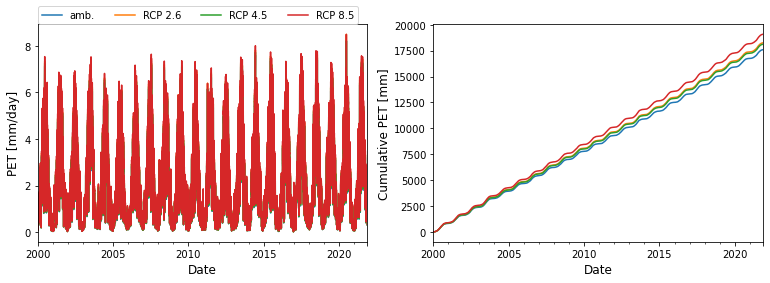

In [5]:
fig, axs = plt.subplots(figsize=(13,4), ncols=2)
pet_df.plot(ax=axs[0])
pet_df.cumsum().plot(ax=axs[1], legend=False)

axs[0].set_ylabel("PET [mm/day]", fontsize=12)
axs[1].set_ylabel("Cumulative PET [mm]", fontsize=12)
axs[0].legend(ncol=6, loc=[0,1.])
for i in (0,1):
    axs[i].set_xlabel("Date", fontsize=12)